# Big Mart Outlet Sales Analysis and Prediction

# Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
# Importing required libraries for this project
import pandas as pd                           # Linear Algebra
import numpy as np                            # Data Processing

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Train test split, cross-validation
from sklearn.model_selection import train_test_split,cross_val_score as CVS

# models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# model savving and loading
import pickle

# optional setting for notebook theme and warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [2]:
df = pd.read_csv("_1_Train.csv")                            # Train set
test_df = pd.read_csv('_1_test.csv')                        # Test set

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Statistical Analysis

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Unique values in each column
df.nunique().sort_values(ascending = False)

Item_Visibility              7880
Item_MRP                     5938
Item_Outlet_Sales            3493
Item_Identifier              1559
Item_Weight                   415
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Item_Fat_Content                5
Outlet_Type                     4
Outlet_Size                     3
Outlet_Location_Type            3
dtype: int64

### Checking null values

In [7]:
print('No of null values:\n\n',df.isnull().sum().sort_values(ascending = False))
print('\n\nPercentage of null values:\n\n',df.isnull().mean().sort_values(ascending = False))
print('\n\nTest_Data:')
print('\nPercentage of null values:\n\n',test_df.isnull().mean().sort_values(ascending = False))

No of null values:

 Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Percentage of null values:

 Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64


Test_Data:

Percentage of null values:

 Outlet_Size  

### Let's check the value_counts

In [8]:
for col in df.columns:
    print(df[col].value_counts(),'\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat     

Here `Outlet_Size` is a categorical column. So, we will treat missing values with mode.

In [9]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace = True)
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0],inplace = True)

let's fill Null values in `Item_Weight` with the value occuuring in the next entry else by mean

In [10]:
df['Item_Weight'] = df['Item_Weight'].fillna(method='bfill',axis = 0).fillna(df['Item_Weight'].mean())
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(method='bfill',axis = 0).fillna(test_df['Item_Weight'].mean())

In [11]:
# Let's check for null values one last time
print(df.isna().sum().sum(),test_df.isna().sum().sum())

0 0


There are some inconsistent entries in `Item_Fat_Content` column. Let's handle them.

In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat':'LF','Regular':'reg','LF':'LF','reg':'reg','low fat':'LF'})
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'Low Fat':'LF','Regular':'reg','LF':'LF','reg':'reg','low fat':'LF'})

df['Item_Fat_Content'].value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
# Checking duplicated entries
df.duplicated().sum()

0

## Data Visualization

### Univariate Analysis

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

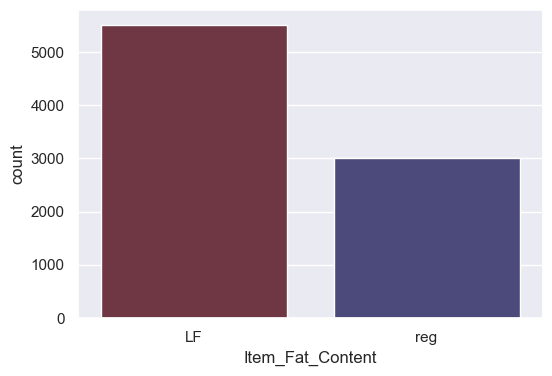

In [14]:
plt.figure(figsize =(6,4))
sns.countplot(data = df, x = 'Item_Fat_Content',palette = 'icefire_r')

__Low-Fat__ Items are sold the most.

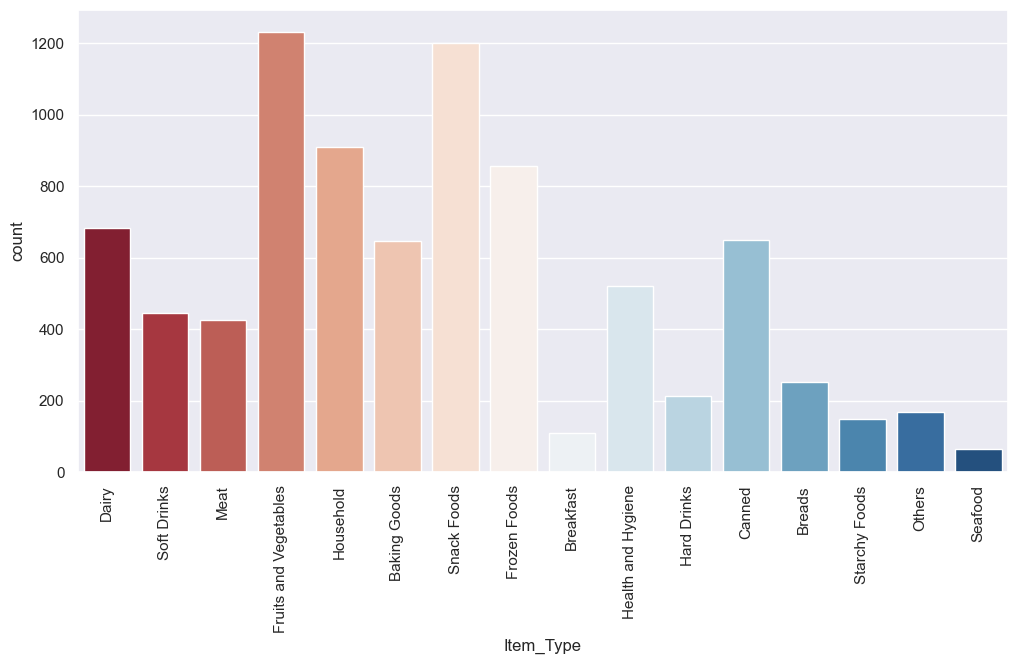

In [15]:
plt.figure(figsize =(12,6))
sns.countplot(data = df, x = 'Item_Type',palette = 'RdBu')
plt.xticks(rotation = 90)
plt.show()

___Snack Foods___ and ___Fruits and Vegetables___ are quite popular.

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

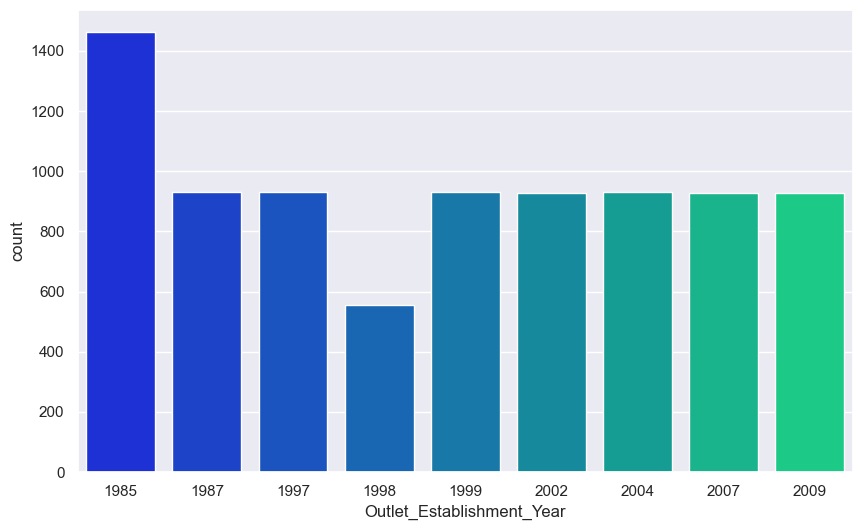

In [16]:
plt.figure(figsize =(10,6))
sns.countplot(data = df, x = 'Outlet_Establishment_Year',palette = 'winter')

Sales are almost same as compared to the past few years.

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

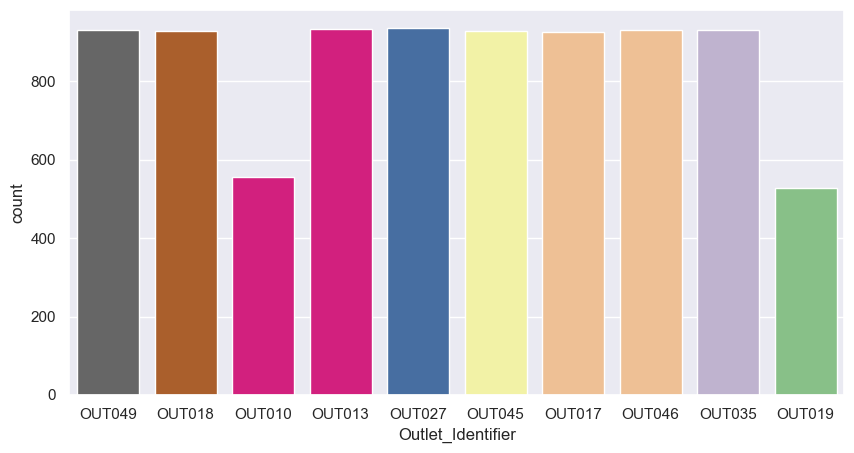

In [17]:
plt.figure(figsize =(10,5))
sns.countplot(data = df, x = 'Outlet_Identifier',palette = 'Accent_r')

Items sold in ___OUT010___ and ___OUT019___ are quite low than the others.

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

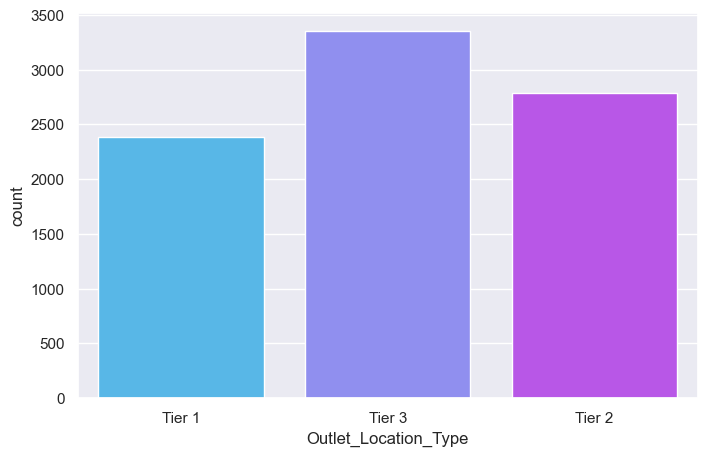

In [18]:
plt.figure(figsize =(8,5))
sns.countplot(data = df, x = 'Outlet_Location_Type',palette = 'cool')

Most sales are from __Tier3__ location.

<Axes: xlabel='Outlet_Type', ylabel='count'>

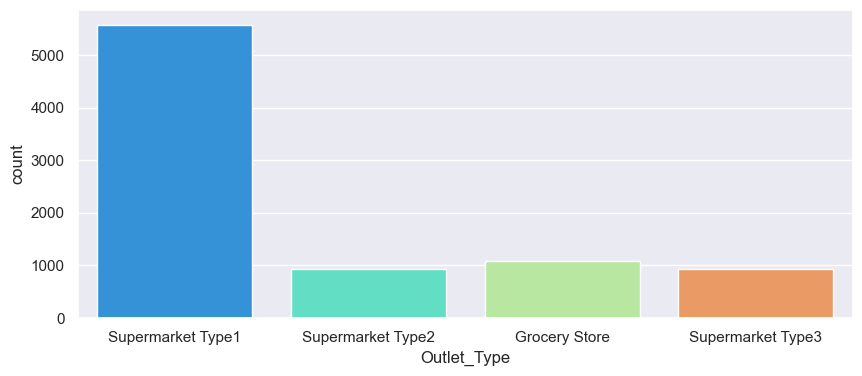

In [19]:
plt.figure(figsize =(10,4))
sns.countplot(data = df, x = 'Outlet_Type',palette = 'rainbow')

___Supermarket Type1___ is having much more sales compared to the others.

### Bivariate analysis

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

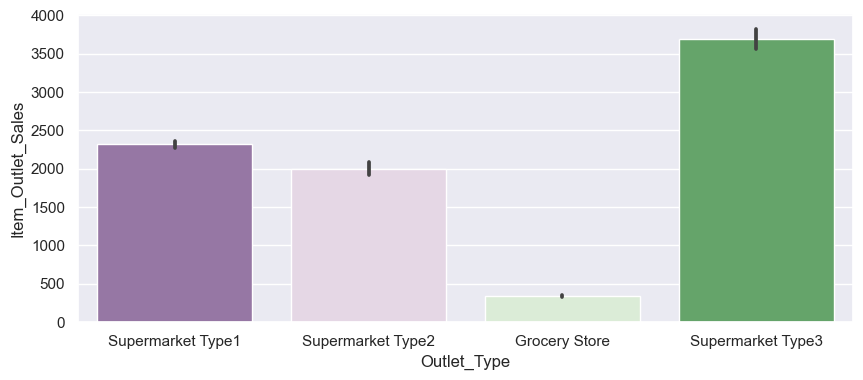

In [20]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'Outlet_Type',y = 'Item_Outlet_Sales', data = df,palette = 'PRGn')

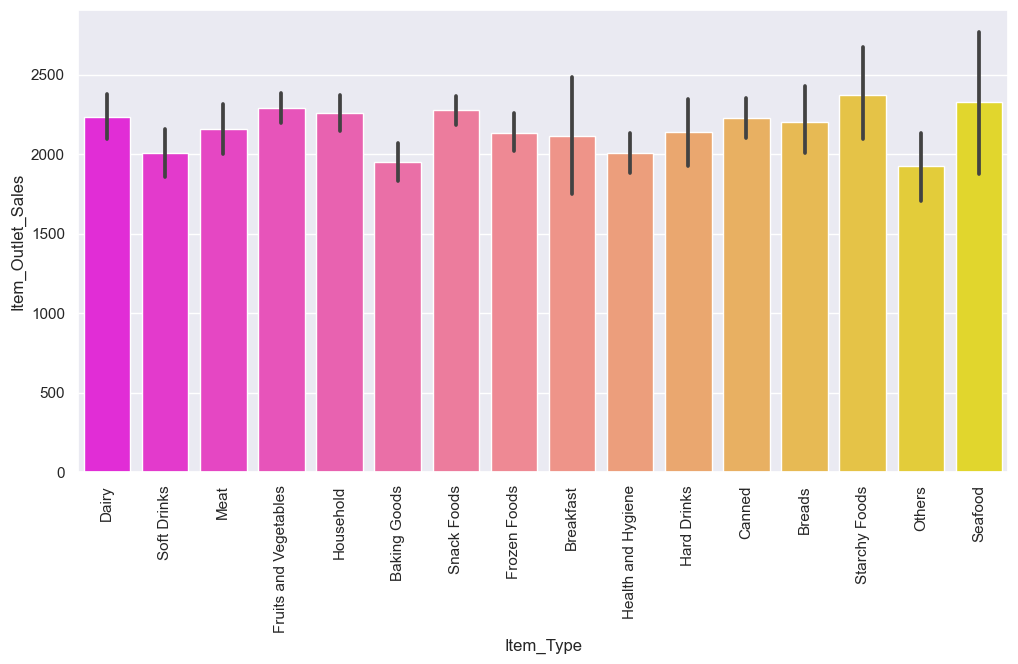

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Item_Type',y = 'Item_Outlet_Sales', data = df,palette = 'spring')
plt.xticks(rotation = 90)
plt.show()

There ain't much difference in sales in __Item-Types__.

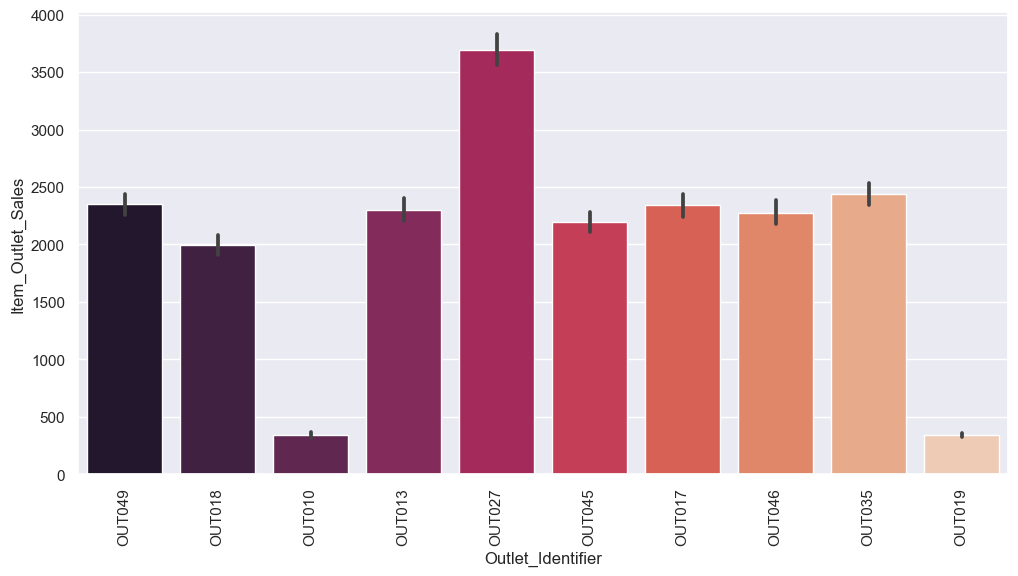

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Outlet_Identifier',y = 'Item_Outlet_Sales', data = df,palette = 'rocket')
plt.xticks(rotation = 90)
plt.show()

We are getting higher sales from Outlet __OUT027__ compared to the others.

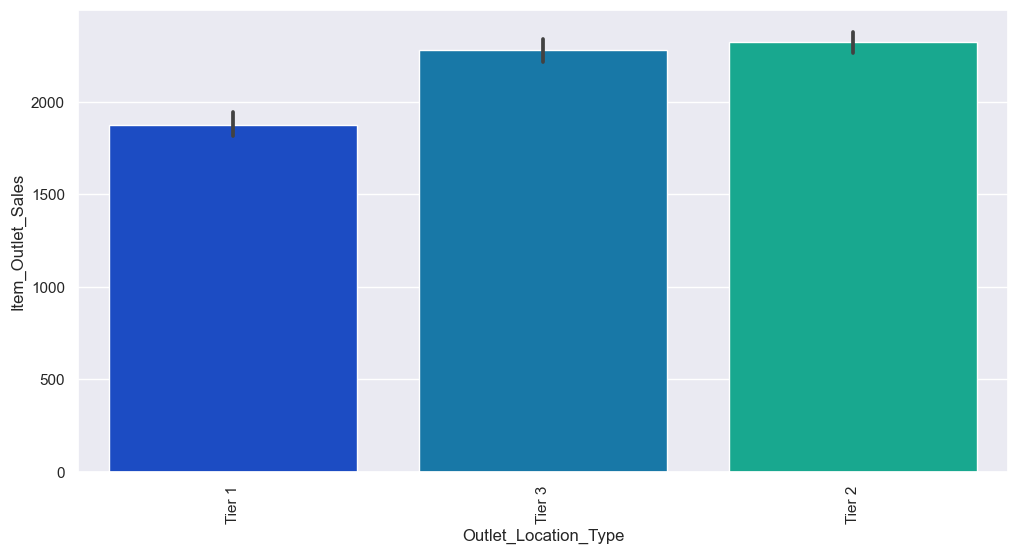

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales', data = df,palette = 'winter')
plt.xticks(rotation = 90)
plt.show()

Getting higher sales form Tier2 and Tier3 (Tier2 being the highest).

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

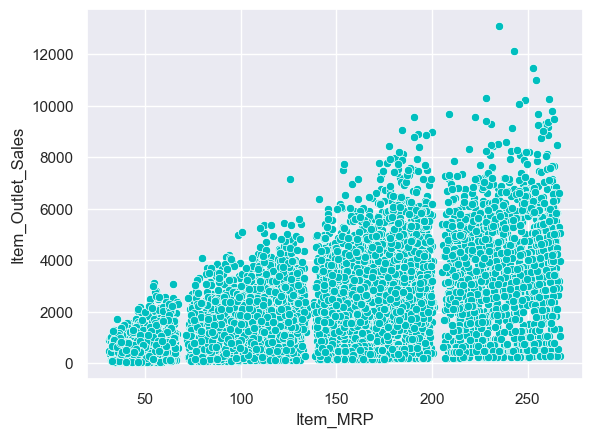

In [24]:
sns.scatterplot(data = df, x = 'Item_MRP',y = 'Item_Outlet_Sales',color = 'c')

___Item_Outlet_Sales___ increases with the increase in ___Item_MRP___.

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

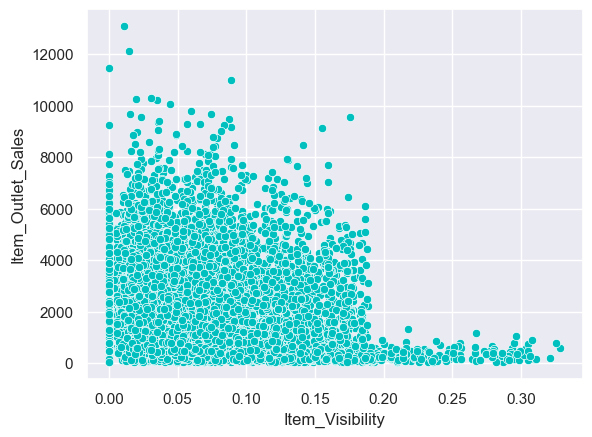

In [25]:
sns.scatterplot(data = df, x = 'Item_Visibility',y = 'Item_Outlet_Sales',color = 'c')

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

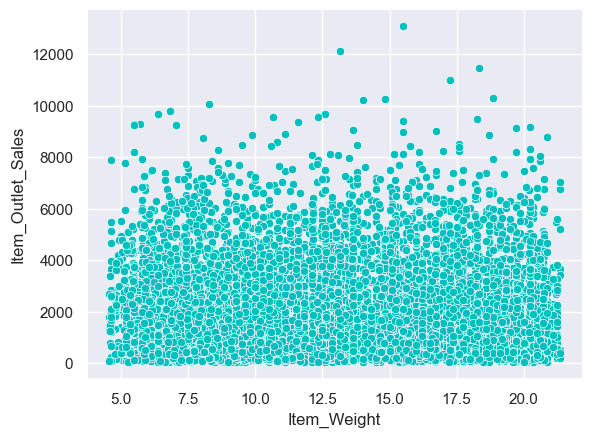

In [26]:
sns.scatterplot(data = df, x = 'Item_Weight',y = 'Item_Outlet_Sales',color = 'c')

There's not some specific pattern here.

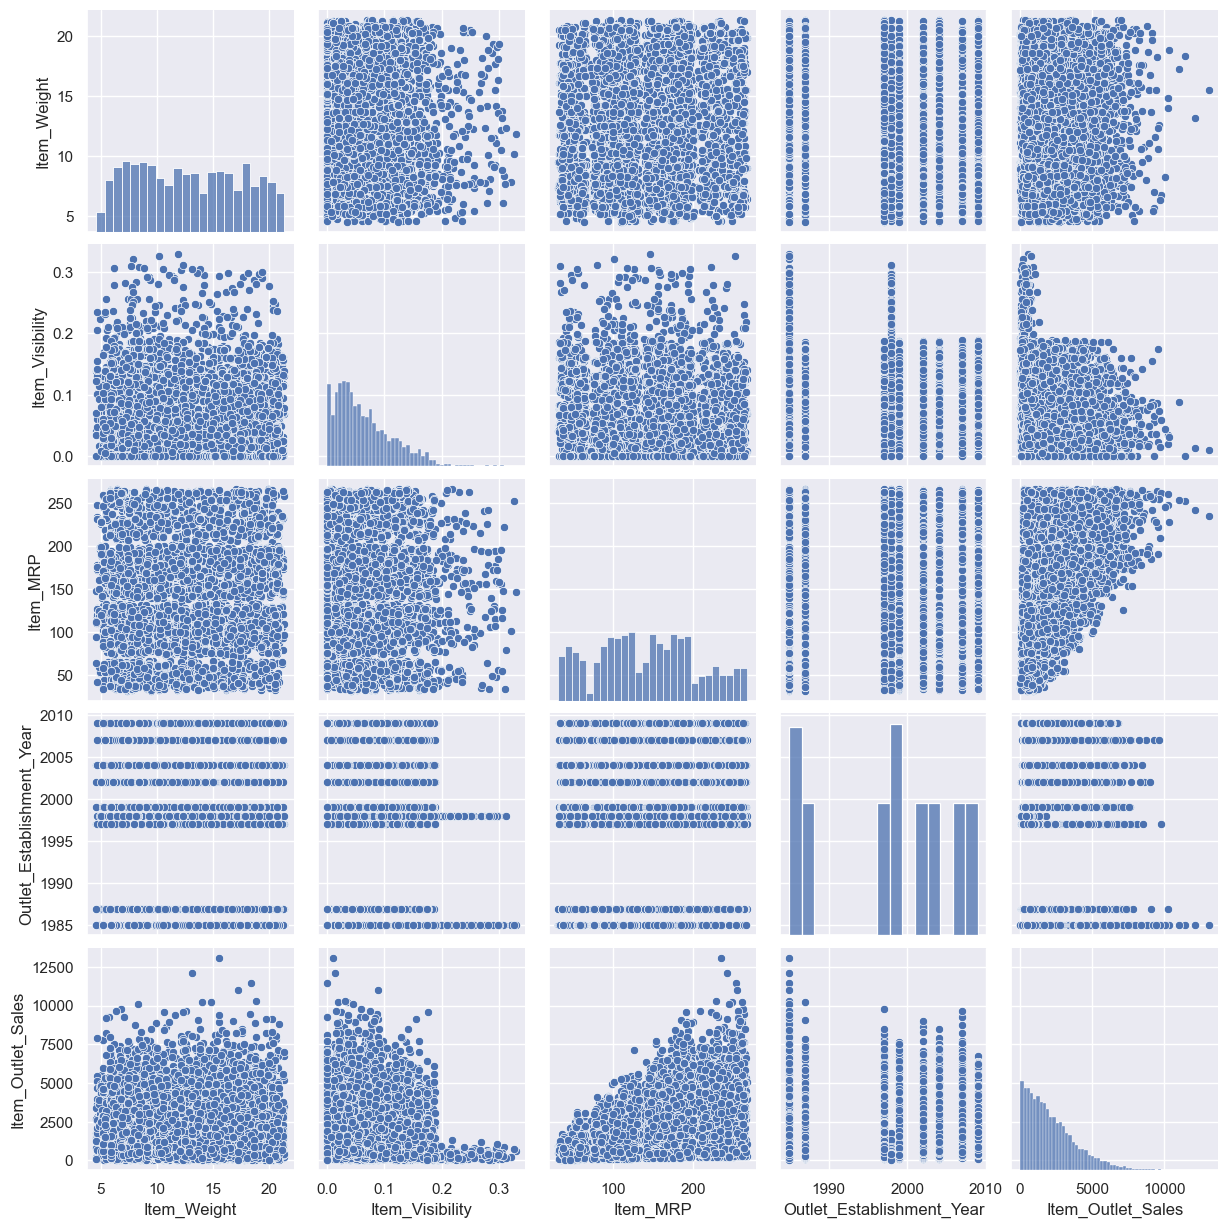

In [27]:
sns.pairplot(data = df)

### Multivariate analysis

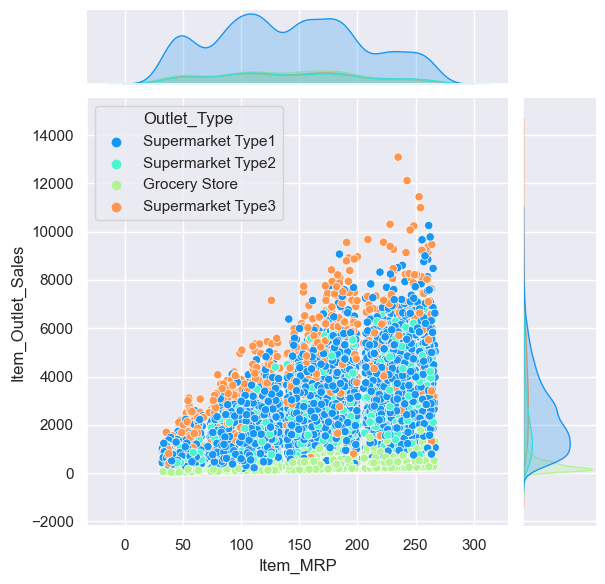

In [28]:
sns.jointplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales',hue='Outlet_Type',palette='rainbow')

<Axes: >

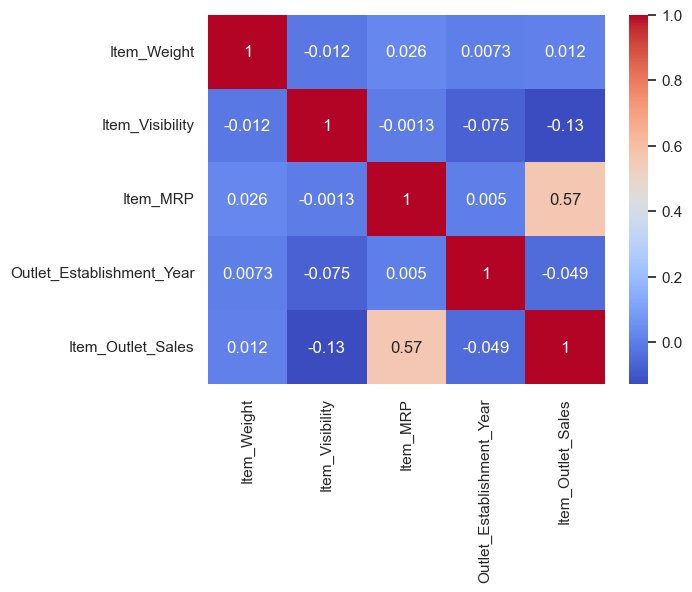

In [29]:
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')

Item_MRP is highly correlated with the target column.

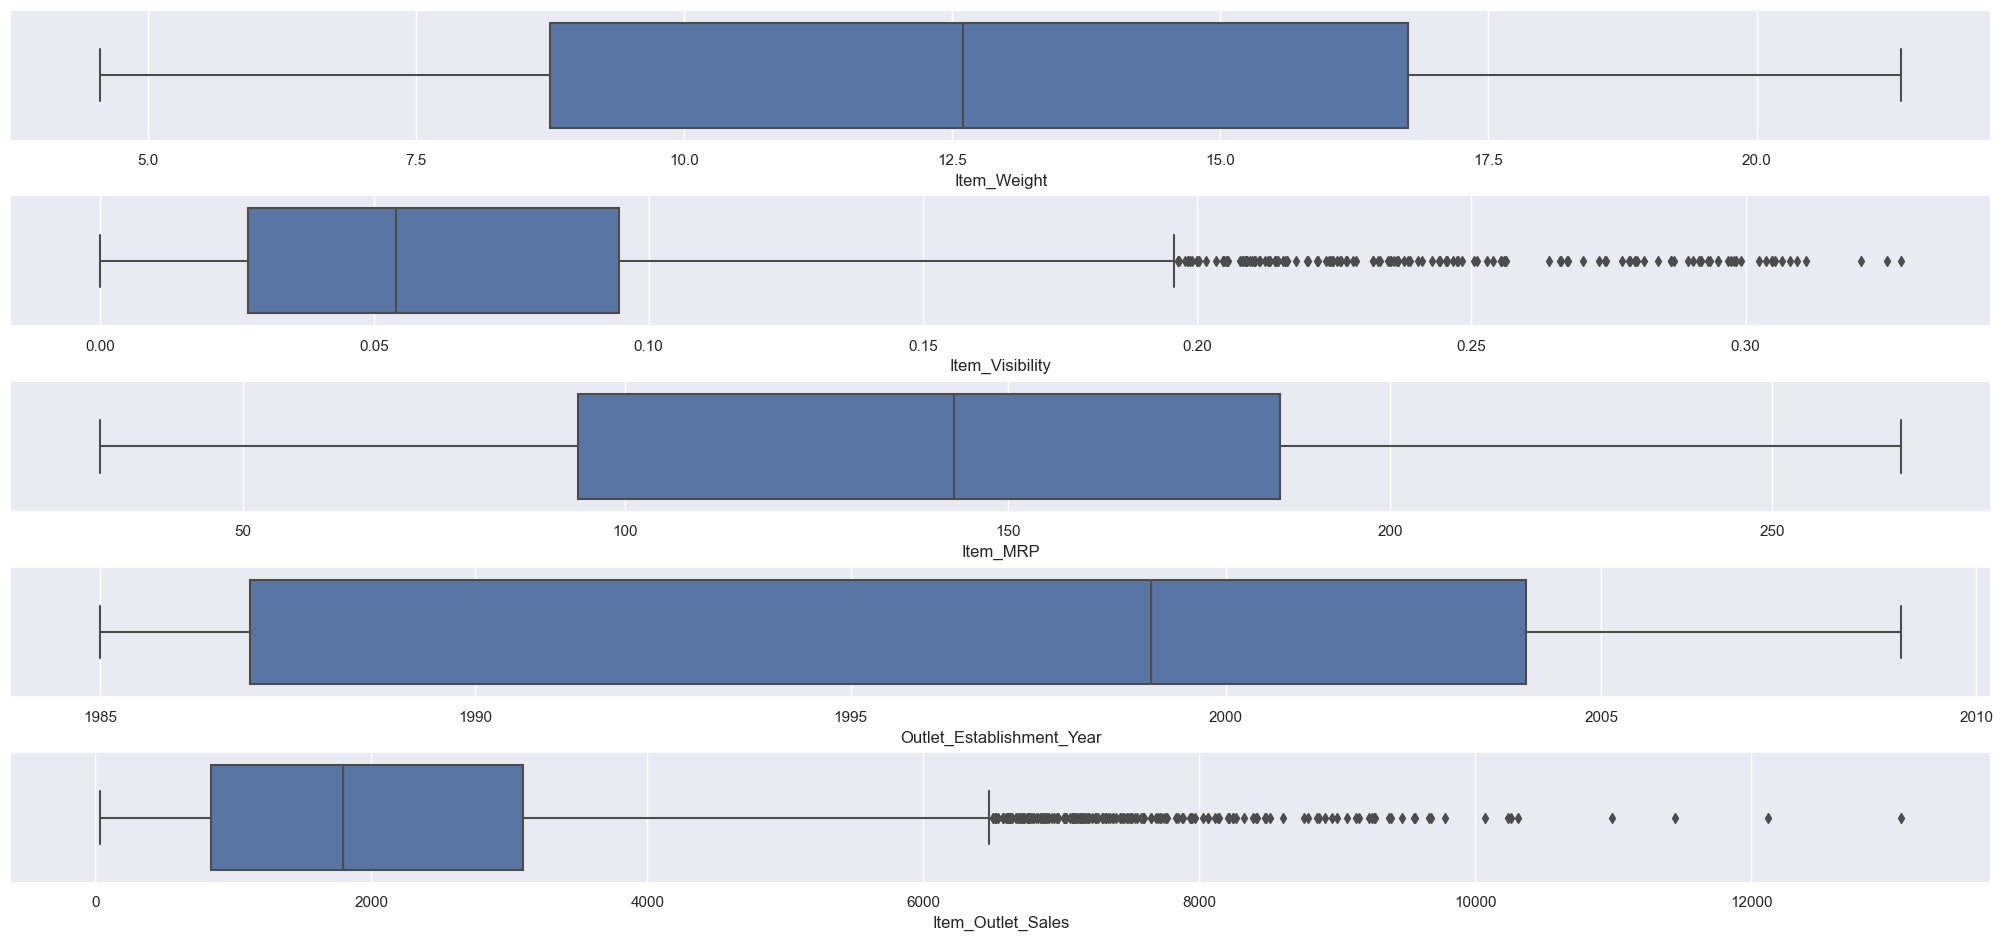

In [30]:
plt.figure(figsize=(20, 20))
cols = df.select_dtypes(include=[int, float]).columns.tolist()
num_plots = len(cols)
rows = 11
cols_per_row = num_plots // rows + 1

for i, col in enumerate(cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])

plt.tight_layout(pad=0.4, h_pad=0.4, w_pad=0.4)
plt.show()

# Handling Outliers

We are gonna handle outliers using IQR method.

In [31]:
# Loop for replacing outliers under lower bound with the lower bound value:

for col in df.select_dtypes([int,float]).columns:
        col_iqr = df[col].quantile(.75) - df[col].quantile(.25)
        col_min = df[col].quantile(.25) - (1.5 * col_iqr)
        df[col][df[col] < col_min] = col_min

In [32]:
# Loop for replacing outliers above upper bound with the upper bound value:

for col in df.select_dtypes([int,float]).columns:
        col_iqr = df[col].quantile(.75) - df[col].quantile(.25)
        col_max = df[col].quantile(.75) + (1.5 * col_iqr)
        df[col][df[col] > col_max] = col_max

In [33]:
# test set

# Loop for replacing outliers under lower bound with the lower bound value:

for col in test_df.select_dtypes([int,float]).columns:
        col_iqr = test_df[col].quantile(.75) - test_df[col].quantile(.25)
        col_min = test_df[col].quantile(.25) - (1.5 * col_iqr)
        test_df[col][df[col] < col_min] = col_min
    
# Loop for replacing outliers above upper bound with the upper bound value:

for col in test_df.select_dtypes([int,float]).columns:
        col_iqr = test_df[col].quantile(.75) - test_df[col].quantile(.25)
        col_max = test_df[col].quantile(.75) + (1.5 * col_iqr)
        test_df[col][df[col] > col_max] = col_max

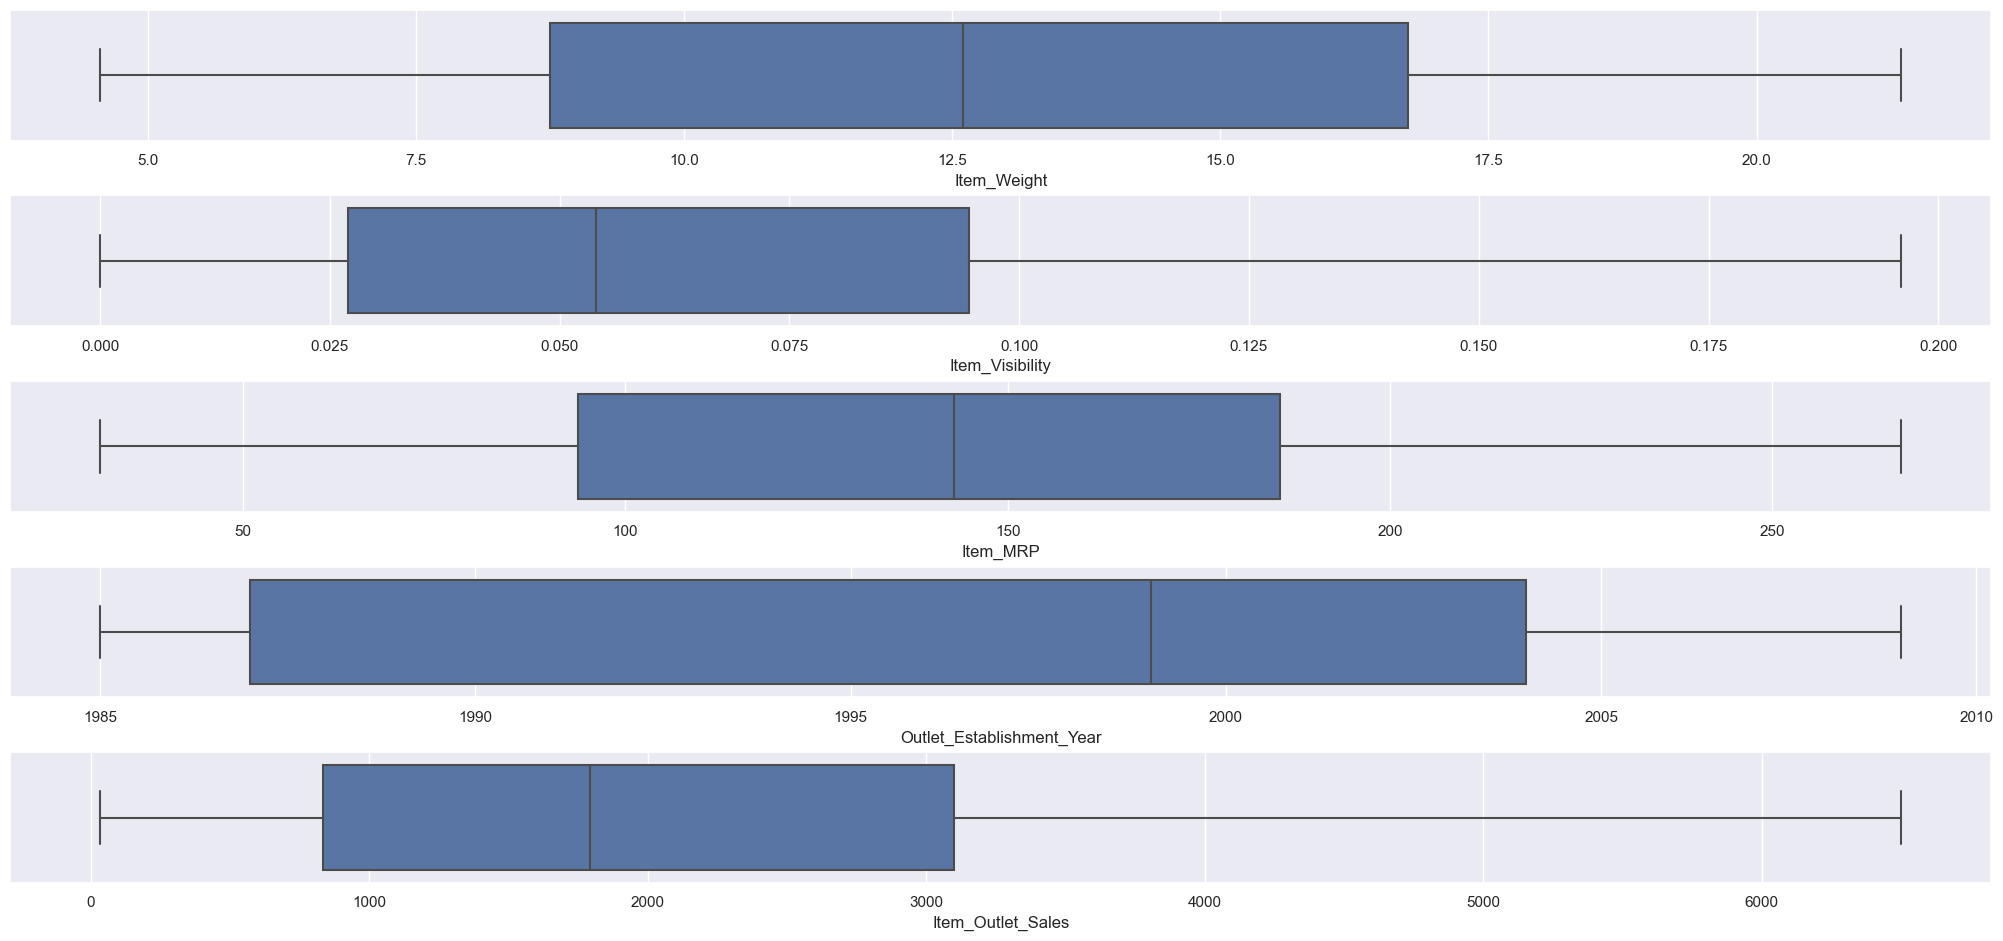

In [34]:
plt.figure(figsize=(20, 20))
cols = df.select_dtypes(include=[int, float]).columns.tolist()
num_plots = len(cols)
rows = 11
cols_per_row = num_plots // rows + 1

for i, col in enumerate(cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])

plt.tight_layout(pad=0.4, h_pad=0.4, w_pad=0.4)
plt.show()

## Data Encoding

In [35]:
print(df.select_dtypes(include = object).nunique().sort_values(ascending = False))      ## Unqiue_counts
df.select_dtypes(include = object)

Item_Identifier         1559
Item_Type                 16
Outlet_Identifier         10
Outlet_Type                4
Outlet_Size                3
Outlet_Location_Type       3
Item_Fat_Content           2
dtype: int64


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,LF,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,reg,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,LF,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,reg,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,LF,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,LF,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,reg,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,LF,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,reg,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [36]:
# dropping irrelevant column
df.drop(['Item_Identifier','Outlet_Identifier'],axis = 1, inplace = True)

test_df.drop(['Item_Identifier','Outlet_Identifier'],axis = 1, inplace = True)

In [37]:
label_encoding_cols = ['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type']
one_hot_cols = ['Item_Type','Outlet_Type']

In [38]:
# Label_encoding
encoder = LabelEncoder()
for col in label_encoding_cols:
    df[col] = encoder.fit_transform(df[col])
    test_df[col] = encoder.transform(test_df[col])

In [39]:
# One_Hot_Encoding
df = pd.get_dummies(df)
test_df = pd.get_dummies(test_df)

In [40]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1999,1,0,3735.1380,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,443.4228,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,0,2097.2700,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,1987,0,2,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0,0.007565,107.8622,1999,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,8.300,1,0.038428,87.3198,2007,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14.600,0,0.099575,241.7538,1998,1,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,7.315,0,0.015388,155.0340,2007,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,9.800,1,0.118599,234.2300,1985,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## splitting data into input and target features

In [42]:
x = df.drop('Item_Outlet_Sales',axis = 1)
y = df['Item_Outlet_Sales']

## Train test split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

__Standardization__:
Standardization is a preprocessing technique commonly used in machine learning to transform features (variables) so that they have a mean of 0 and a standard deviation of 1.

In [44]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

scaled_test_df = pd.DataFrame(scaler.transform(test_df), columns = test_df.columns)

In [45]:
# Cross-validation function
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## Model making

1. __Random Forest regressor :__

_Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees._

In [46]:
rf = RandomForestRegressor(n_estimators = 500,max_depth=5, min_samples_leaf=5,min_samples_split = 7)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=500)

In [47]:
rf_pred = rf.predict(x_test)
MSE = round(mean_squared_error(y_test,rf_pred),2)
MAE = round(mean_absolute_error(y_test,rf_pred),2)
rf_r2_score = round(r2_score(y_test,rf_pred),4)
rf_cv_score = round(CVS(rf, x, y, cv=5).mean(),4)

In [48]:
print('MSE: ',MSE)
print('MAE: ',MAE)
print('r2_score: ',rf_r2_score)
cross_val('RF',rf,x,y,5)

MSE:  925643.52
MAE:  695.37
r2_score:  0.6303
RF Scores:
0.61
0.59
0.59
0.62
0.62
Average RF score: 0.6064


2. __Linear Regression :__

_In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables)._

In [49]:
lr = LinearRegression(fit_intercept= True,copy_X= True,positive=False)
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
lr_pred = lr.predict(x_test)
lr_MSE = round(mean_squared_error(y_test,lr_pred),2)
lr_MAE = round(mean_absolute_error(y_test,lr_pred),2)
lr_r2_score = round(r2_score(y_test,lr_pred),4)
lr_cv_score = round(CVS(lr, x, y, cv=5).mean(),4)

In [51]:
print('MSE: ',lr_MSE)
print('MAE: ',lr_MAE)
print('r2_score: ',lr_r2_score)
cross_val('LR',lr,x,y,5)

MSE:  1023077.61
MAE:  769.85
r2_score:  0.5914
LR Scores:
0.58
0.56
0.56
0.58
0.58
Average LR score: 0.5714


3. __Ridge Regression :__

_Ridge Regression adds a regularization term to the linear regression objective function. This regularization term is the sum of the squares of the coefficients (excluding the intercept term) multiplied by a parameter called the regularization strength (alpha)._

In [52]:
r_model = Ridge(alpha=9,solver='sag',fit_intercept=True,copy_X= True,positive=False)
r_model.fit(x_train,y_train)

Ridge(alpha=9, solver='sag')

In [53]:
r_pred = r_model.predict(x_test)
r_MSE = round(mean_squared_error(y_test,r_pred),2)
r_MAE = round(mean_absolute_error(y_test,r_pred),2)
r_r2_score = round(r2_score(y_test,r_pred),4)
r_cv_score =  round(CVS(r_model, x, y, cv=5).mean(),4)

In [54]:
print('MSE: ',r_MSE)
print('MAE: ',r_MAE)
print('r2_score: ',r_r2_score)
cross_val('Ridge',r_model,x,y,5)

MSE:  1023042.28
MAE:  769.85
r2_score:  0.5914
Ridge Scores:
0.58
0.56
0.56
0.58
0.58
Average Ridge score: 0.5717


4. __XGBRegressor :__

_XGBoost is an ensemble learning method that combines the predictions of multiple individual models (often decision trees) to create a more accurate and robust final prediction. It's known for its efficiency, flexibility, and high performance in various machine learning competitions and real-world applications._

In [55]:
xg = XGBRegressor(max_depth= 2,n_estimators = 30,subsample = 0.7)
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=30, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
xg_pred = xg.predict(x_test)
xg_MSE = round(mean_squared_error(y_test,xg_pred),2)
xg_MAE = round(mean_absolute_error(y_test,xg_pred),2)
xg_r2_score = round(r2_score(y_test,xg_pred),4)
xg_cv_score =  round(CVS(xg, x, y, cv=5).mean(),4)

In [58]:
print('MSE: ',xg_MSE)
print('MAE: ',xg_MAE)
print('r2_score: ',xg_r2_score)
cross_val('XGBoost',xg,x,y,5)

MSE:  938965.58
MAE:  704.33
r2_score:  0.625
XGBoost Scores:
0.61
0.6
0.59
0.62
0.62
Average XGBoost score: 0.6068


In [59]:
mse = [MSE,lr_MSE,r_MSE,xg_MSE]
mae = [MAE,lr_MAE,r_MAE,xg_MAE]
r2  = [rf_r2_score,lr_r2_score,r_r2_score,xg_r2_score]
cv_score  = [rf_cv_score,lr_cv_score,r_cv_score,xg_cv_score]

Models = pd.DataFrame({
    'models': ["Random Forest","Linear","Lasso","XGBoost"],
    'MAE': mae, 'MSE': mse, 'R^2':r2, 'Cross Validation Score':cv_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
0,Random Forest,695.37,925643.52,0.6303,0.6065
3,XGBoost,704.33,938965.58,0.6250,0.6068
1,Linear,769.85,1023077.61,0.5914,0.5714
2,Lasso,769.85,1023042.28,0.5914,0.5717


## Conclusion:

As Random forest has minimum __MAE__ and __MSE__ with high __r2_score__ and good __cross-validation score__. That is the best model.

**Best Model:** `RandomForestRegressor`.

## Saving Model using pickle

In [60]:
with open('big_mart_model.pkl','wb') as file:
    pickle.dump(rf,file)

___Final Predictions On The Test Dataset using RandomForestRegressor model.___

In [61]:
with open('big_mart_model.pkl','rb') as file:
    model = pickle.load(file)
    test_df['Item_Outlet_Sales'] = model.predict(scaled_test_df)

In [62]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750,0,0.007565,107.8622,1999,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1586.964152
1,8.300,1,0.038428,87.3198,2007,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1438.344509
2,14.600,0,0.099575,241.7538,1998,1,2,0,0,0,...,1,0,0,0,0,1,0,0,0,558.328106
3,7.315,0,0.015388,155.0340,2007,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,2479.205728
4,9.800,1,0.118599,234.2300,1985,1,2,0,0,0,...,0,0,0,0,0,0,0,0,1,5279.633181
